In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

In [2]:
# проведем анализ файла, в котором содержится различная информация про автомобили на вторичном рынке Германии

# я видел этот файл ранее и знаю, что здесь есть 3 колонки, в которых указаны временные данные
# но тип данных некорретный, давайте это исправим при чтении файла

In [3]:
autos = pd.read_csv(r'H:\Code\Portfolio\Project 3\autos.csv', parse_dates = ['DateCrawled','DateCreated','LastSeen'])
autos

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:26


In [4]:
# посмотрим информацию про наш ДС, он довольно объемный, временные данные в нужных колонках
# видим, что есть пропуски

In [5]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

In [6]:
# давайте детальнее посмотрим на пропуски в колонках

In [7]:
autos.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [8]:
# посмотрим на долю Нанов в ДCe
# колонка Repaired имеет более 20% пропусков

In [9]:
autos.isna().mean()*100

DateCrawled           0.000000
Price                 0.000000
VehicleType          10.579368
RegistrationYear      0.000000
Gearbox               5.596709
Power                 0.000000
Model                 5.560588
Kilometer             0.000000
RegistrationMonth     0.000000
FuelType              9.282697
Brand                 0.000000
Repaired             20.079070
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
dtype: float64

In [10]:
# уберем Наны только из типа транспортного средства и пересохраним наш ДС
# он уменьшился чуть более чем на 10%

In [11]:
autos.dropna(subset=['VehicleType'], inplace = True)

In [12]:
# давайте посмотрим на названия колонок
# в них есть нюанс - CamelCase

In [13]:
autos.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [14]:
# будем это исправлять
# можно сделать что-то простое, например, изменить регистр
# но это не подходит

In [15]:
autos.columns.map(lambda x: x.upper())

Index(['DATECRAWLED', 'PRICE', 'VEHICLETYPE', 'REGISTRATIONYEAR', 'GEARBOX',
       'POWER', 'MODEL', 'KILOMETER', 'REGISTRATIONMONTH', 'FUELTYPE', 'BRAND',
       'REPAIRED', 'DATECREATED', 'NUMBEROFPICTURES', 'POSTALCODE',
       'LASTSEEN'],
      dtype='object')

In [16]:
# сделаем все названия колонок с маленькой буквы, слова разделим нижними подчеркиваниями

# оформим это в виде функции, которую будем применять ко всем названиям колонок
# функция на вход будет ожидать какое имя колонки

# на самом деле, задача не такая простая, так как мы не можем просто так сделать Реплэйсы
# более того, помимо работы с заменой, нам надо еще работать с индексацией
# массив данных из колонок относится к классу Индекс

In [17]:
# переходим к самой функции

# сразу превратим в список имя колонки
# делаем мы это из-за того, что строка - это неизменяемый тип данных
# мы можем только создать новую строку на основании старой
# а список мы можем изменять с легкостью

# цикл будет проходить не по всему названию колонки, а названию со второго элемента
# нам не нужно нижнее подчеркивание перед первым элементом, а он всегда будет с большой буквы

# другая проблема - нам нужно добавлять значения по индексам, а у нас их пока нет

# первично цикл работал через Энумирэйт, счетчик тоже начинается с 1 !!!
# for i,c in enumerate(col_name[1:],1):
#         if c.isupper():
#         col_name.insert(i,'_')

# всё было хорошо пока мы не дошли до колонки NumberOfPictures
# в ней 3 заглавные буквы
# проблема в том, что Энумирэйт возвращает первичную индексацию, без учета добавленного нижнего подчеркивания
# из-за этого второй пробел был перед f, а не перед P !!!



# будем формировать индексы классическим счетчиком, который начинается с 1
# создадим счетчик до цикла

# увеличиваться он будет вне Ифа для увеличения индексации + после Инсерта, так как у нас появился доп элемент !!!
# Инсерт по определенному индексу '_'

# теперь нам остается склеить все символы из списка в строку и перевести ее в нижний регистр
# нам поможет метод Джоин + Лоуэр
# их мы будем применять к пустой строке, которая и станет названием колонки

In [18]:
def transform(col_name):
    
    col_name = list(col_name)
    i = 1
    
    for c in col_name[1:]:
        if c.isupper():
            col_name.insert(i,'_')
            i += 1
        i += 1
    return ''.join(col_name).lower()

In [19]:
# пременяем к колонкам Трансформ
# всё идеально

In [20]:
autos.columns.map(transform)

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

In [21]:
# скорректируем наш ДС

In [22]:
autos.columns = autos.columns.map(transform)

In [23]:
# посмотрим на дубликаты значений в ДСе
# у нас их всего 4

In [24]:
autos[autos.duplicated()]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08,0,89518,2016-03-09 09:46:57
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18,0,36391,2016-03-18 18:46:15


In [25]:
# пересохраним наш ДС без их учёта дубликатов для дальнейшей работы

In [26]:
autos = autos.drop_duplicates()


In [27]:
# посмотрим на аномалии в колонке Брэнд и Модель
# есть нижние подчеркивания, давайте их заменим на пробелы

In [28]:
autos['brand'].unique()

array(['audi', 'jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'seat', 'honda',
       'fiat', 'opel', 'mini', 'smart', 'sonstige_autos', 'alfa_romeo',
       'subaru', 'volvo', 'mitsubishi', 'kia', 'hyundai', 'suzuki',
       'lancia', 'citroen', 'toyota', 'chevrolet', 'dacia', 'daihatsu',
       'saab', 'chrysler', 'jaguar', 'rover', 'porsche', 'daewoo',
       'land_rover', 'trabant', 'lada'], dtype=object)

In [29]:
autos['model'].unique()

array([nan, 'grand', 'golf', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'twingo', 'a_klasse',
       'scirocco', '5er', 'arosa', 'civic', 'transporter', 'punto',
       'e_klasse', 'kadett', 'one', 'fortwo', 'clio', '1er', 'b_klasse',
       'signum', 'astra', 'a8', 'jetta', 'polo', 'fiesta', 'c_klasse',
       'micra', 'vito', 'sprinter', '156', 'escort', 'forester',
       'xc_reihe', 'scenic', 'a4', 'a1', 'combo', 'focus', 'tt', 'corsa',
       'a6', 'jazz', 'omega', 'slk', '7er', '80', '147', 'meriva',
       'z_reihe', 'sorento', 'v40', 'ibiza', 'mustang', 'eos', 'touran',
       'getz', 'insignia', 'a3', 'megane', 'lupo', 'r19', 'mondeo',
       'cordoba', 'colt', 'impreza', 'vectra', 'berlingo', 'tiguan',
       'sharan', '6_reihe', 'c4', 'panda', 'up', 'i_reihe', 'ceed',
       'kangoo', '5_reihe', 'yeti', 'octavia', 'zafira', 'mii',
       'rx_reihe', '6er', 'fox', 'matiz', 'beetle', 'rio', 'touareg',
       'logan', 'caddy', 'spid

In [30]:
# во фрэймах у нас строки
# значит нужен строковый метод str.replace, которым произведем замены

In [31]:
autos['brand'] = autos['brand'].str.replace('_',' ')
autos['model'] = autos['model'].str.replace('_',' ')

C:\Users\vladi\AppData\Local\Temp\ipykernel_13300\922320796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['brand'] = autos['brand'].str.replace('_',' ')
C:\Users\vladi\AppData\Local\Temp\ipykernel_13300\922320796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['model'] = autos['model'].str.replace('_',' ')


In [32]:
# посмотрим на уникальные значения в годах регистрации
# особых аномалий нет, но если вернуть NaN значения, которые мы удалили, то увидим 1000ый и 2500ый год

In [33]:
autos['registration_year'].sort_values().unique()

array([1910, 1915, 1919, 1920, 1923, 1925, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [34]:
# посмотрим распределение по годам, сколько каких

In [35]:
autos['registration_year'].value_counts()

1999    22650
2001    20076
2003    19722
2005    19598
2000    19575
        ...  
1949        1
1931        1
1919        1
1925        1
1946        1
Name: registration_year, Length: 97, dtype: int64

In [36]:
# давайте посмотрим на самую раннюю и позднюю дату просмотра объявлений

In [37]:
autos['date_crawled'].min()

Timestamp('2016-03-05 14:06:22')

In [38]:
autos['date_crawled'].max()

Timestamp('2016-04-07 14:36:58')

In [39]:
# давайте посмотрим на распределение автомобилей по дате их регистрации
# основная масса в примерном диапазоне 1990 - 2015

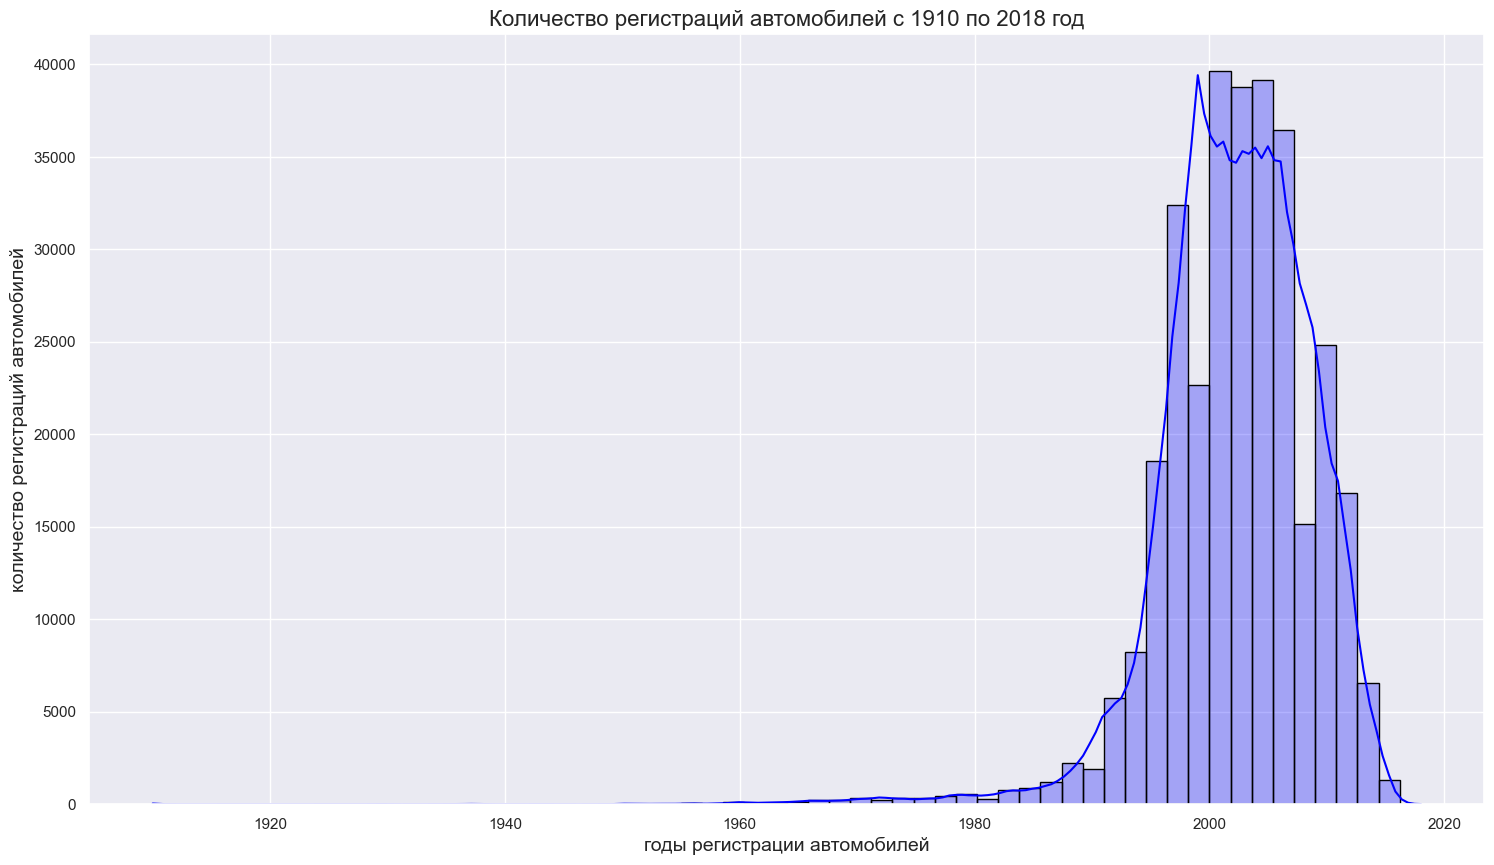

In [40]:
sns.set(rc = {'figure.figsize':(18,10)})

registration = sns.histplot(autos, 
                            x = 'registration_year', 
                            bins = 60, 
                            kde = True,
                            color = 'blue', 
                            edgecolor='black',
                            alpha = 0.3)

plt.xlabel('годы регистрации автомобилей',size= 14)
plt.ylabel('количество регистраций автомобилей',size= 14)
plt.title('Количество регистраций автомобилей с 1910 по 2018 год', size= 16)
plt.show()

In [41]:
# давайте посмотрим детальнее на отрезок с 1910 по 1965

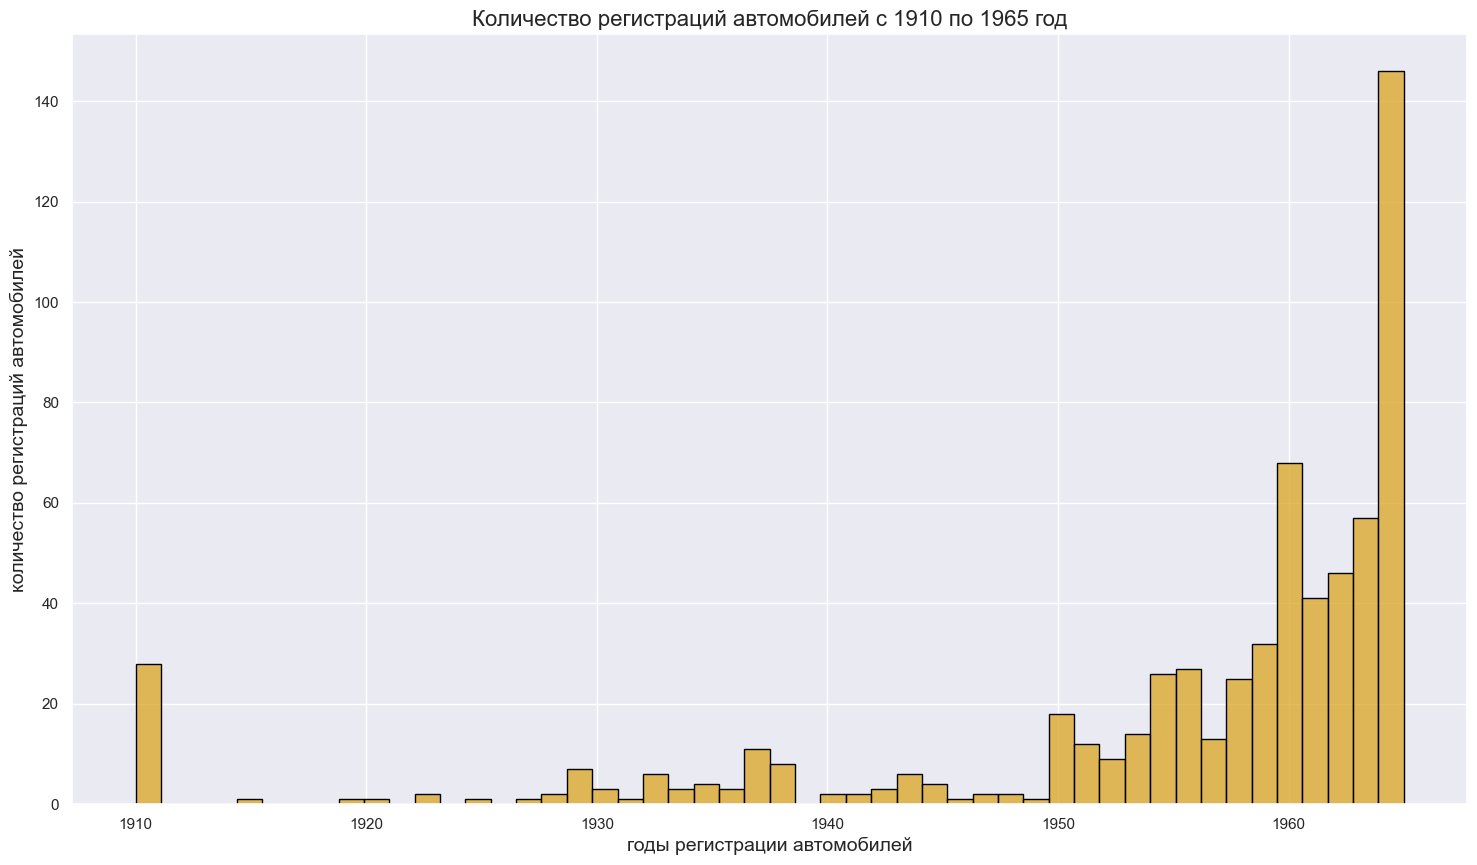

In [42]:
early_registration = sns.histplot(autos[(autos['registration_year'] >= 1910) & (autos['registration_year'] <= 1965)], 
                            x = 'registration_year', 
                            bins = 50,
                            color = 'goldenrod', 
                            edgecolor='black')

plt.xlabel('годы регистрации автомобилей',size= 14)
plt.ylabel('количество регистраций автомобилей',size= 14)
plt.title('Количество регистраций автомобилей с 1910 по 1965 год', size= 16)
plt.show()

In [43]:
# посмотрим на уникальные месяцы регистрации автомобилей
# увидим месяц под номером 0, похоже на аномалию

In [44]:
sorted(autos['registration_month'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [45]:
# более 22000 значений, будем их убирать

In [46]:
autos[autos['registration_month'] == 0].shape

(22436, 16)

In [47]:
# пересохраним наш ДС
# ДС уменьшился ещё более чем на 22000 записей

In [48]:
autos = autos[autos['registration_month'] != 0]
autos.shape

(294439, 16)

In [49]:
# давайте посмотрим на соответствующий график
# в лидерах - март, июнь, апрель

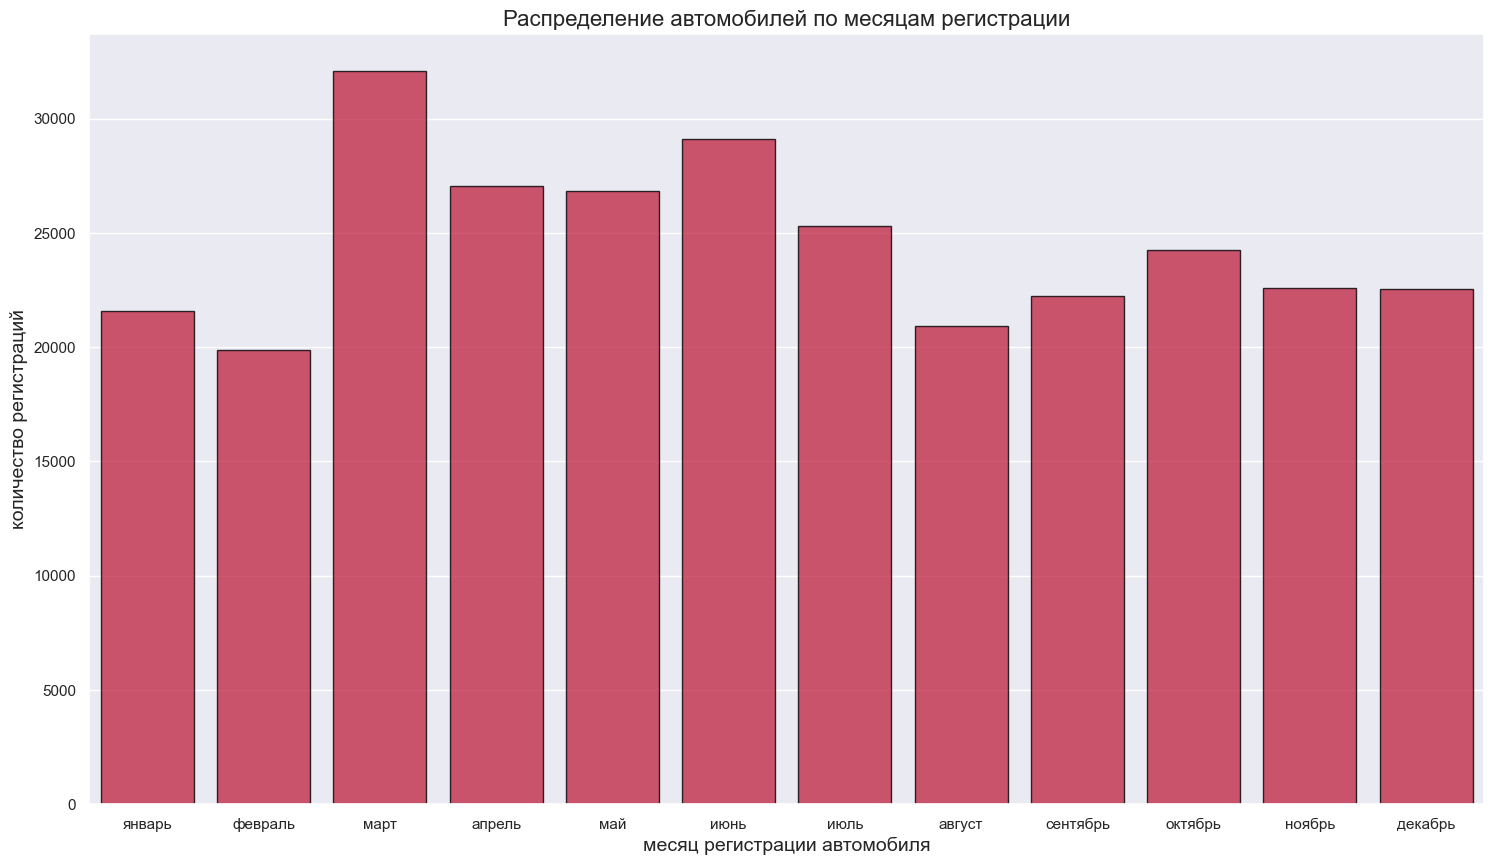

In [50]:
months = sns.countplot(autos, x = 'registration_month',
             color = 'crimson', 
             edgecolor='black', 
             alpha = 0.8)

months.set_xticks(range(12))
months.set_xticklabels(['январь', 
                        'февраль', 
                        'март', 
                        'апрель', 
                        'май', 
                        'июнь', 
                        'июль', 
                        'август',
                        'сентябрь',
                        'октябрь',
                        'ноябрь',
                        'декабрь']) 


plt.xlabel('месяц регистрации автомобиля',size= 14)
plt.ylabel('количество регистраций',size= 14)
plt.title('Распределение автомобилей по месяцам регистрации',size= 16)

plt.show()

In [51]:
# посмотрим на список кол-ва регистраций авто за первые и последние 15 лет

In [52]:
autos['registration_year'].value_counts().sort_index().head(15)

1910    13
1915     1
1919     1
1920     1
1923     1
1925     1
1927     1
1928     1
1929     7
1930     2
1931     1
1932     2
1933     2
1934     2
1935     3
Name: registration_year, dtype: int64

In [53]:
autos['registration_year'].value_counts().sort_index().tail(15)

2004    18632
2005    18803
2006    18924
2007    16468
2008    14783
2009    13977
2010    10455
2011     9664
2012     7020
2013     4022
2014     2464
2015     1087
2016      173
2017       12
2018        4
Name: registration_year, dtype: int64

In [54]:
# сделаем гистограмму по цене автомобилей

# мы видим, что очень много записей со стоимостью 0 и немногим более
# эти стоимости могут быть некорректными

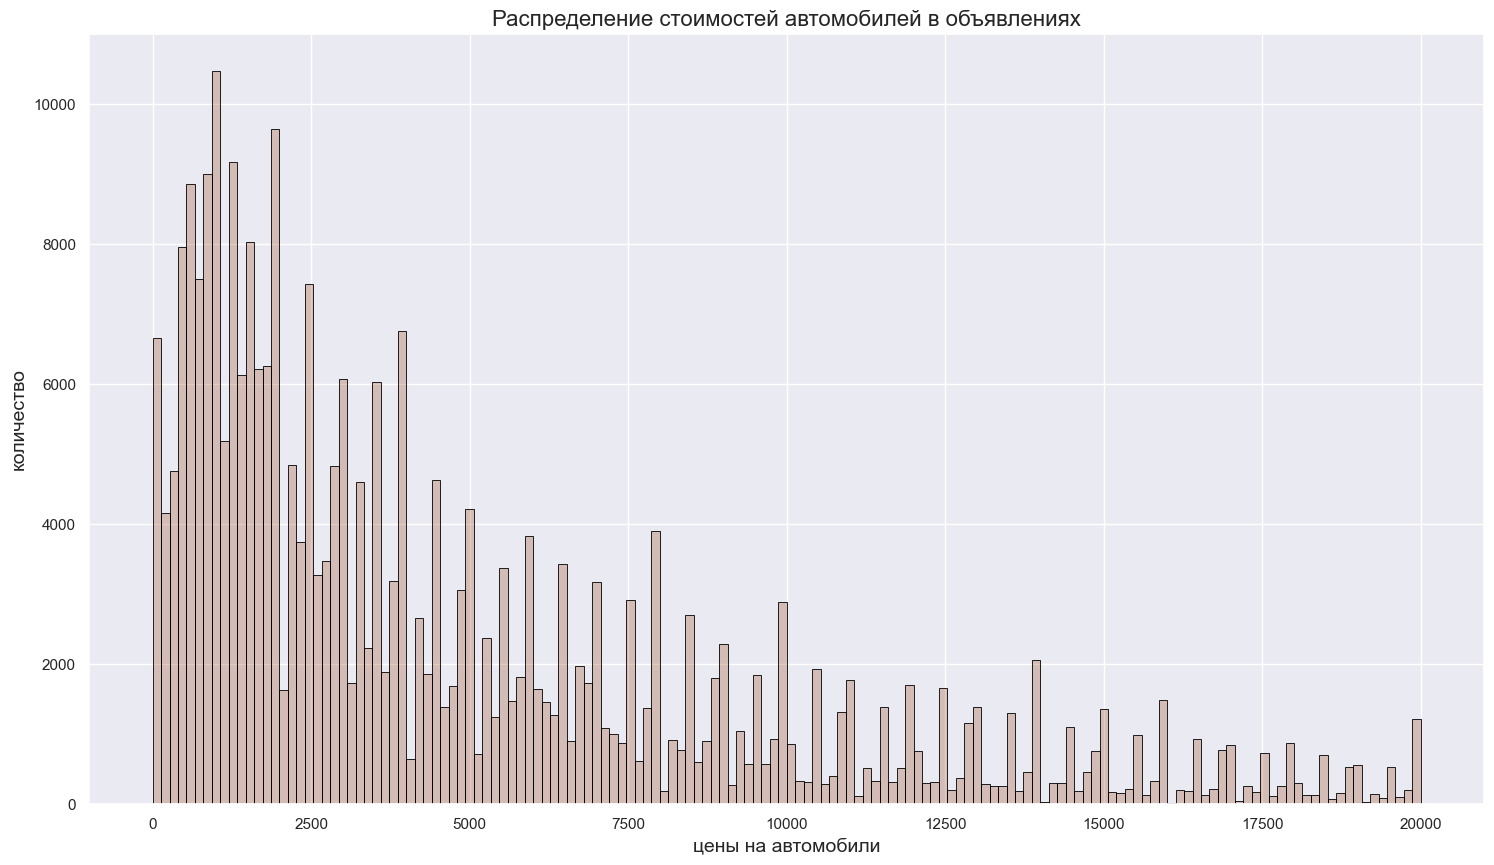

In [55]:
price = sns.histplot(autos, x = 'price',
             bins = 150,
             color = 'sienna', 
             edgecolor='black', 
             alpha = 0.3)

plt.xlabel('цены на автомобили',size= 14)
plt.ylabel('количество',size= 14)
plt.title('Распределение стоимостей автомобилей в объявлениях', size= 16)
plt.show()

In [56]:
# давайте детальнее посмотрим на авто со стоимостью до 100 условных единиц
# мы получим более 6000 записей

In [57]:
autos[autos['price'] <= 100].shape

(6419, 16)

In [58]:
autos[autos['price'] == 0].shape

(4961, 16)

In [59]:
# сделаем ДС, где будут цены более 99
# ДФ опять немного уменьшился

In [60]:
price_autos = autos[autos['price'] > 99]
price_autos.shape

(288483, 16)

In [61]:
# сделаем график распределения автомобилей по типу кузова транспортного средства
# седаны, малогаборитные и универсалы - это топ 3

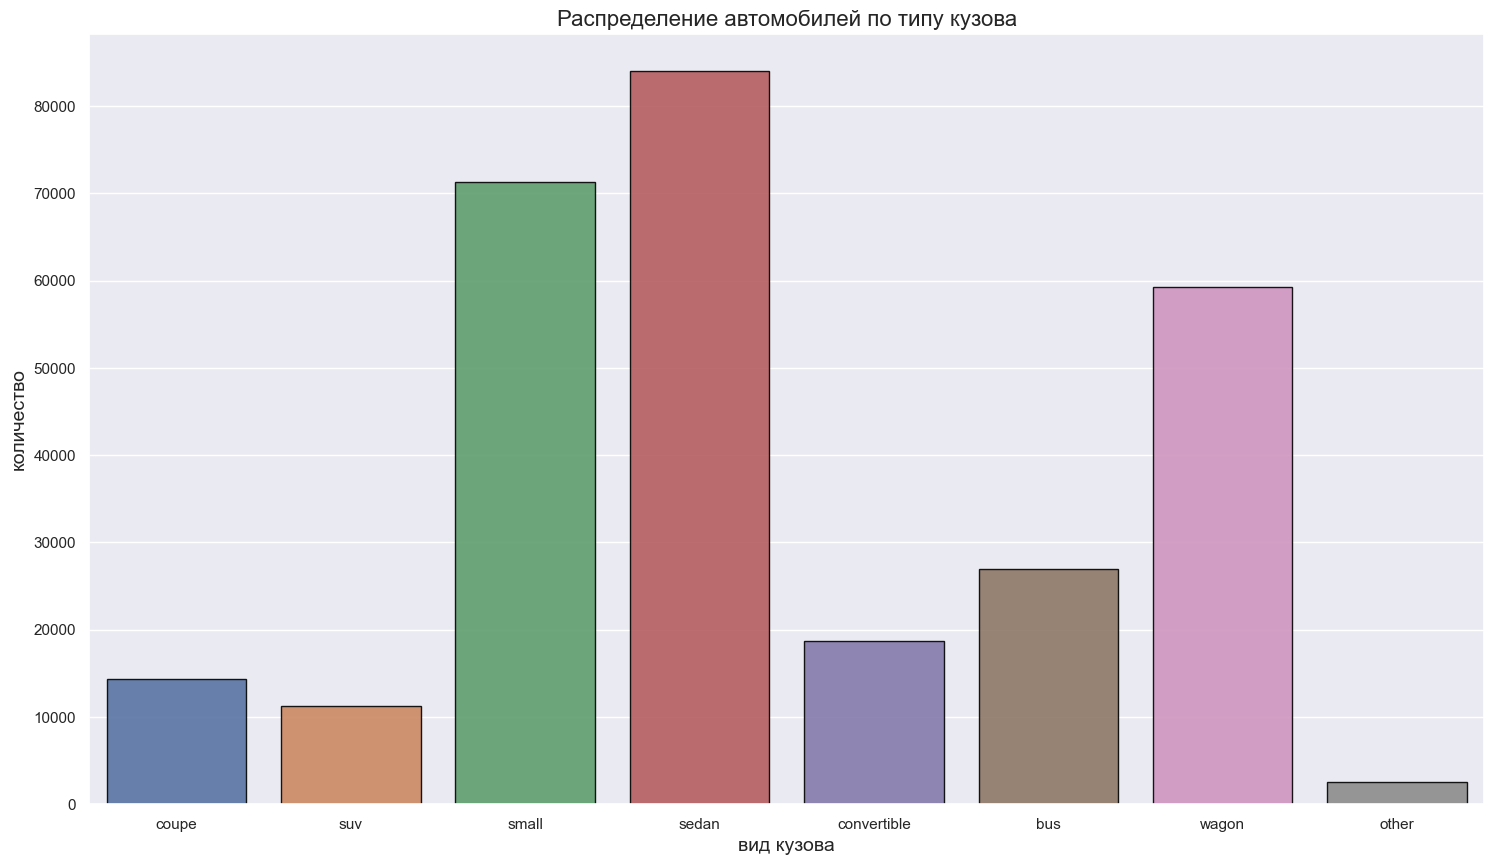

In [62]:
vehicle_type = sns.countplot(price_autos, 
              x = 'vehicle_type', 
              edgecolor='black', 
              alpha = 0.9)

plt.xlabel('вид кузова',size= 14)
plt.ylabel('количество', size= 14)
plt.title('Распределение автомобилей по типу кузова', size= 16)
plt.show()

In [63]:
# посмотрим на распределение среди производителей авто в объявлениях
# действительно, volkswagen народный автомобиль в данном ДСе

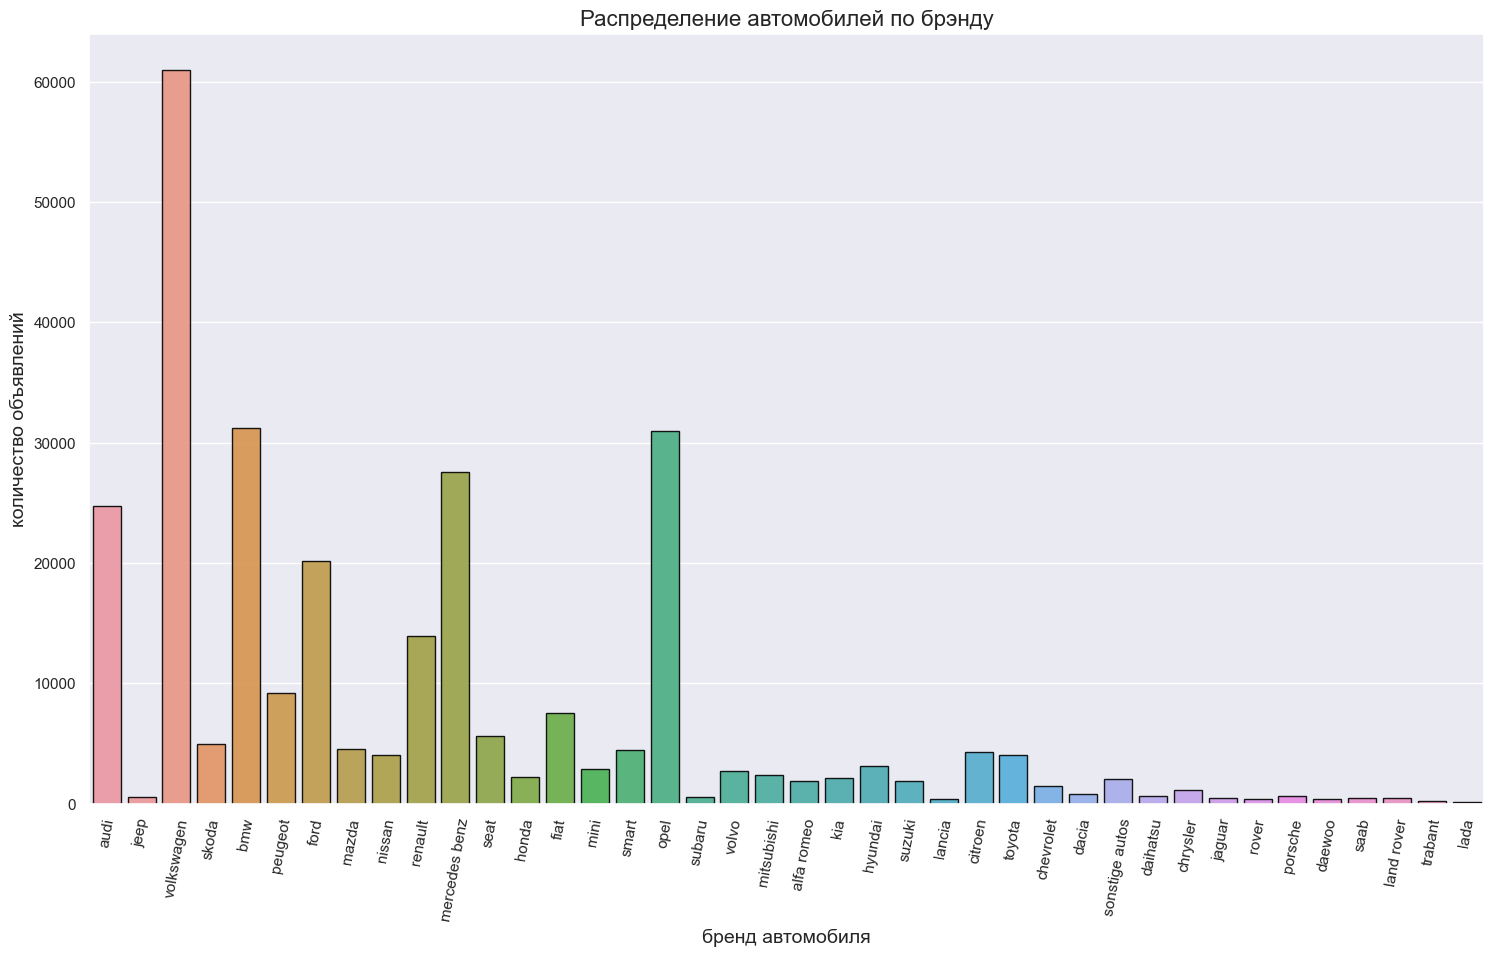

In [64]:
brand = sns.countplot(price_autos, 
              x = 'brand', 
              edgecolor='black', 
              alpha = 0.9)

brand.tick_params(axis = 'x', rotation = 80)

plt.xlabel('бренд автомобиля',size= 14)
plt.ylabel('количество объявлений', size= 14)
plt.title('Распределение автомобилей по брэнду', size= 16)
plt.show()

In [65]:
# давайте посмотрим на уникальные мощности автомобилей
# видим много странных значений

In [66]:
price_autos['power'].sort_values().unique()

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    49,    50,    51,    52,    53,
          54,    55,    56,    57,    58,    59,    60,    61,    62,
          63,    64,    65,    66,    67,    68,    69,    70,    71,
          72,    73,    74,    75,    76,    77,    78,    79,    80,
          81,    82,    83,    84,    85,    86,    87,    88,    89,
          90,    91,    92,    93,    94,    95,    96,    97,    98,
          99,   100,   101,   102,   103,   104,   105,   106,   107,
         108,   109,   110,   111,   112,   113,   114,   115,   116,
         117,   118,   119,   120,   121,   122,   123,   124,   125,
         126,   127,

In [67]:
# давайте посмотрим на авто с мощностью до 50 л.с.
# увидим более 26000 значений

In [68]:
price_autos[price_autos['power'] <= 50].shape

(26153, 16)

In [69]:
# на графике можно увидеть, что менее 45 л.с. нет смысла учитывать

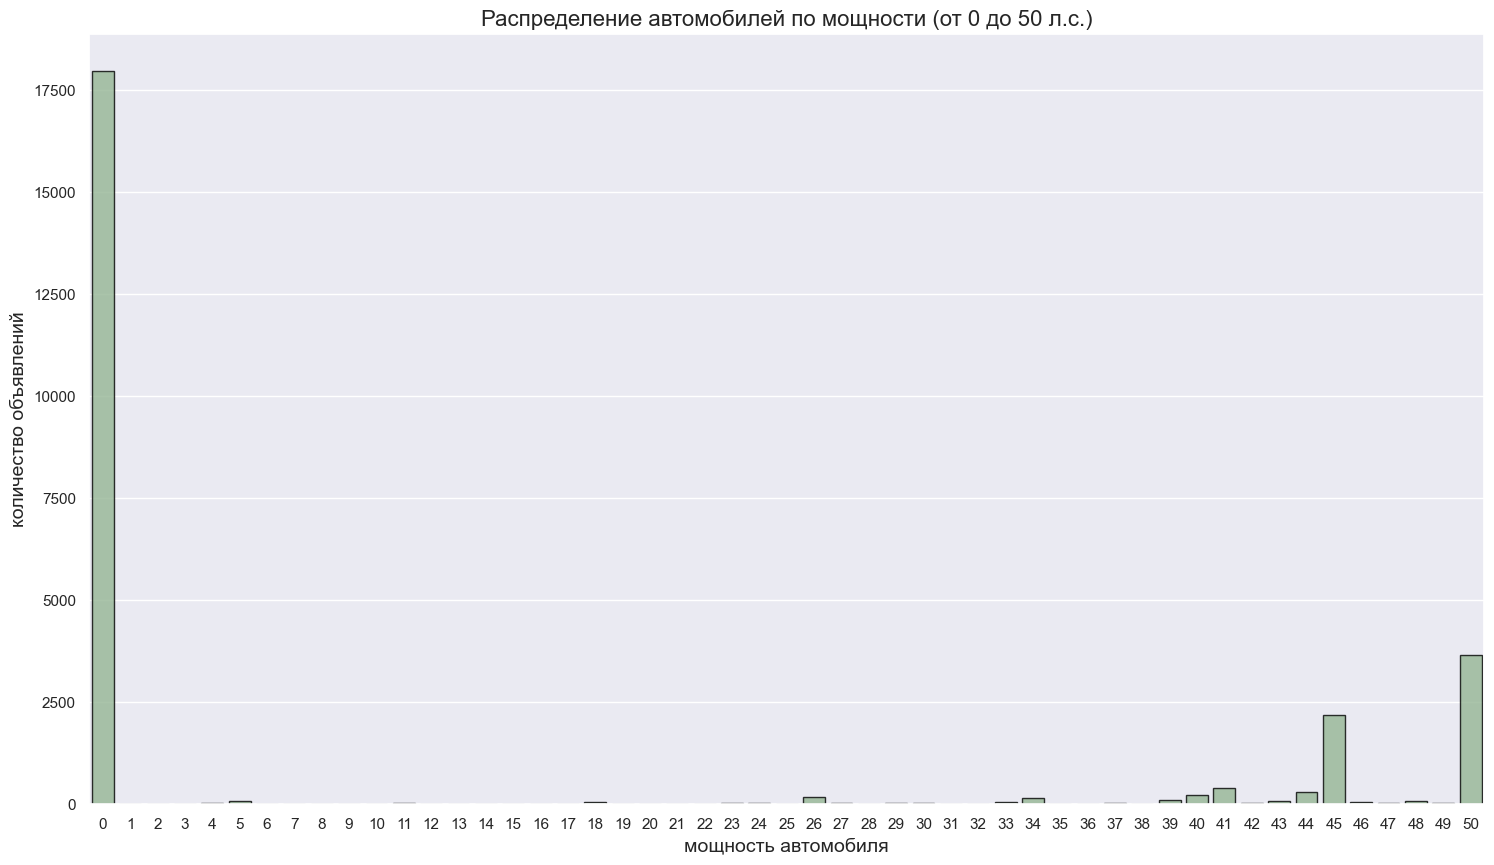

In [70]:
sns.countplot(price_autos[price_autos['power'] <= 50], 
             x = 'power',
             color = 'darkseagreen', 
             edgecolor='black', 
             alpha = 0.8)

plt.xlabel('мощность автомобиля',size= 14)
plt.ylabel('количество объявлений', size= 14)
plt.title('Распределение автомобилей по мощности (от 0 до 50 л.с.)', size= 16)
plt.show()

In [71]:
# посмотрим авто с более чем 500 л.с.
# значений уже не так много

In [72]:
price_autos[price_autos['power'] >= 500].shape

(348, 16)

In [74]:
# давайте посмотрим на распределение авто по лошадиным силам от 45 до 500

In [75]:
price_autos[price_autos['power'].between(45,500)].shape

(268037, 16)

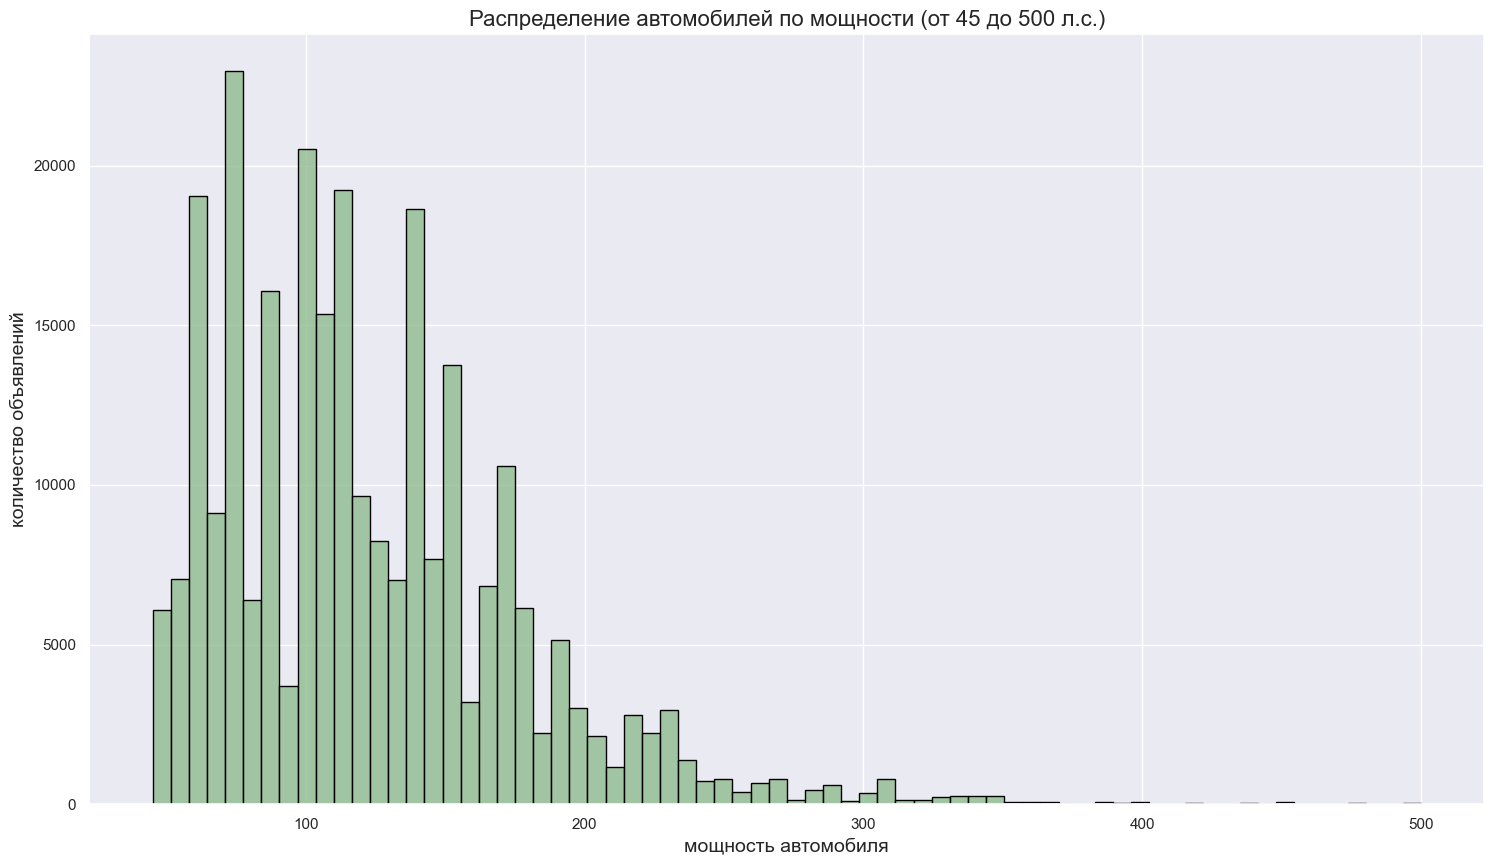

In [76]:
sns.histplot(price_autos[price_autos['power'].between(45,500)], x = 'power',
                     bins = 70,
             color = 'darkseagreen', 
             edgecolor='black', 
             alpha = 0.8)

plt.xlabel('мощность автомобиля',size= 14)
plt.ylabel('количество объявлений', size= 14)
plt.title('Распределение автомобилей по мощности (от 45 до 500 л.с.)', size= 16)
plt.show()

In [77]:
# самый оптимальный вариант для работы на мой взгляд, это диапазон от 45 до 239
# мы отрежем неактуальные значения

In [78]:
price_autos[price_autos['power'].between(45,239)].shape

(260337, 16)

In [79]:
# между 239 и 500 всего навсего 8301 запись

In [80]:
price_autos[price_autos['power'].between(239,500)].shape

(8301, 16)

In [81]:
# ДС похудел, теперь там 257981 записей
# сохраним его

In [82]:
power_autos = price_autos[(price_autos['power'] >= 50) & (price_autos['power'] <= 239)]

In [83]:
# у нас есть колонка с индексами, которую мы никаким образом не задействовали
# давайте это исправим
# я хочу добавить новую колонку в ДС, которая будет отражать название региона, согласно его индексу

In [84]:
# сделаем словарь с названием региона в зависимости от индекса
# так как я использую Рэндж, финальная граница увеличина на 1 !!!
# позже сделаем доп колонку на основании этих данных

In [85]:
# эти индексы я нашел в интернете, это реальные данные
# они относятся к Германии

In [86]:
codes = {'Saxony':[range(1067, 4890),range(8056, 9670)],
        'Brandenburg':[range(3042, 3254),range(14461, 17327)],
        'Saxony-Anhalt':[range(6108, 6929),range(38820, 39650)],
        'Thuringia':[range(7318,7990),range(98527, 99999)],
        'Berlin':range(10115, 14533),
        'Mecklenburg-Vorpommern':range(17033,19418),
        'Hamburg':[range(20038,21150),range(22041,22770)],
        'Lower Saxony': [range(21217,21790),range(26121,38730),range(49074,49850)],
        'Schleswig-Holstein':range(22844,26000),
        'Bremen (state)':[range(27568,27581),range(28195,28780)],
        'North Rhine-Westphalia': [range(32049,33830),range(40196,54586),range(58084,59970)],
        'Hesse':[range(34117,37300),range(60306,63700),range(64283,65937)],
        'Rhineland-Palatinate':[range(54290,57649),range(66849,67830)],
        'Saarland':range(66041,66840),
        'Baden-Württemberg':[range(68131,79880),range(88212,89199)],
        'Bavaria':range(80331,97910)
        }

In [87]:
codes.values()

dict_values([[range(1067, 4890), range(8056, 9670)], [range(3042, 3254), range(14461, 17327)], [range(6108, 6929), range(38820, 39650)], [range(7318, 7990), range(98527, 99999)], range(10115, 14533), range(17033, 19418), [range(20038, 21150), range(22041, 22770)], [range(21217, 21790), range(26121, 38730), range(49074, 49850)], range(22844, 26000), [range(27568, 27581), range(28195, 28780)], [range(32049, 33830), range(40196, 54586), range(58084, 59970)], [range(34117, 37300), range(60306, 63700), range(64283, 65937)], [range(54290, 57649), range(66849, 67830)], range(66041, 66840), [range(68131, 79880), range(88212, 89199)], range(80331, 97910)])

In [88]:
# нужно написать функцию, которая будет определять регион по индексу
# она будет ждать на вход индекс

# функцию мы будем реализовывать через метод apply, который пройдет по всем элементам колонки с индексами

In [89]:
# начнем с цикла

# есть проблема - в значениях словаря есть одиночные, двойные и тройные рэнджи
# будем отталкиваться от типа данных - если это просто рэндж, то история одна, если нет, то другая

In [90]:
r_index = 49075

for key, value in codes.items():
    if type(value) == range:
        if r_index in value:
            print(key)
    else:
        for v in value:
            if r_index in v:
                print(key,type(key))


Lower Saxony <class 'str'>
North Rhine-Westphalia <class 'str'>


In [91]:
# появилась еще одна проблема, некоторые индексы есть в нескольких регионах
# то есть они дублируются, с этим надо что-то сделать

In [92]:
# на основании этого цикла сделаем функцию
# здесь не будет парных значений

# берется первый регион, если их несколько, остальные игнорируются

In [93]:
def region(code):

    for key, value in codes.items():
        if type(value) == range:
            if code in value:
                return key
        else:
            for v in value:
                if code in v:
                    return key

In [94]:
# передадим в apply нашу функцию, а apply сам пройдем по всем элементам колонки

In [95]:
power_autos['postal_code'].apply(region)

1           Rhineland-Palatinate
2                        Bavaria
3                        Bavaria
4                          Hesse
5                   Lower Saxony
                   ...          
354359         Baden-Württemberg
354362                   Bavaria
354366              Lower Saxony
354367                   Bavaria
354368    North Rhine-Westphalia
Name: postal_code, Length: 257981, dtype: object

In [96]:
# посмотрим на разбивку объявлений по регионам

In [97]:
power_autos['postal_code'].apply(region).value_counts() 

North Rhine-Westphalia    53873
Lower Saxony              48176
Bavaria                   39723
Baden-Württemberg         29857
Hesse                     15176
Rhineland-Palatinate      14853
Berlin                    10649
Schleswig-Holstein         9721
Saxony                     8382
Brandenburg                5637
Hamburg                    5067
Saxony-Anhalt              4465
Saarland                   4333
Thuringia                  3953
Mecklenburg-Vorpommern     2632
Name: postal_code, dtype: int64

In [98]:
# реализуем задуманное и поправим индексы в ДСе, так как от множественных манипуляций они некорректные

In [99]:
power_autos['regions'] = power_autos['postal_code'].apply(region)
power_autos.reset_index(drop= True, inplace= True)

C:\Users\vladi\AppData\Local\Temp\ipykernel_13300\2797181810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_autos['regions'] = power_autos['postal_code'].apply(region)


In [100]:
# посмотрим на график по регионам, есть 3 явных лидера

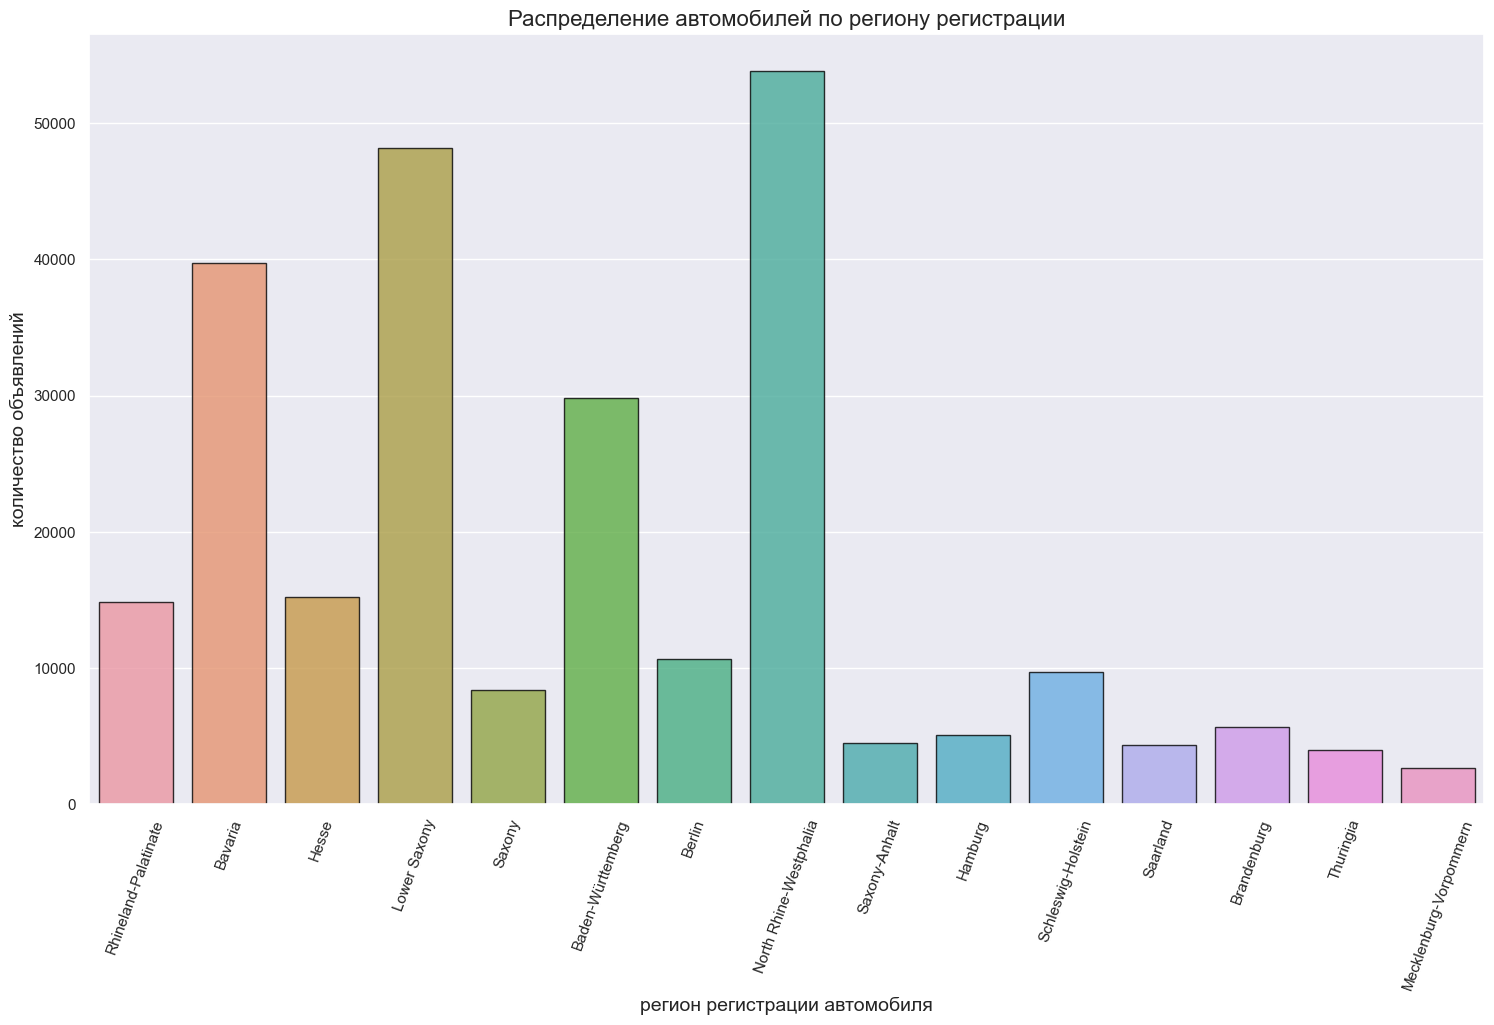

In [101]:
regions = sns.countplot(power_autos, 
             x = 'regions',
             edgecolor='black', 
             alpha = 0.8)

regions.tick_params(axis = 'x', rotation = 70)

plt.xlabel('регион регистрации автомобиля',size= 14)
plt.ylabel('количество объявлений', size= 14)
plt.title('Распределение автомобилей по региону регистрации', size= 16)
plt.show()

In [102]:
# топ 5 регионов выглядят так

In [103]:
power_autos['regions'].value_counts().nlargest(5)

North Rhine-Westphalia    53873
Lower Saxony              48176
Bavaria                   39723
Baden-Württemberg         29857
Hesse                     15176
Name: regions, dtype: int64

In [104]:
# сделаем несколько группировок

# регион, брэнд авто и кол-во объявлений

In [105]:
power_autos.groupby('regions')['brand'].value_counts().to_frame()

brand
regions           brand               
Baden-Württemberg volkswagen      6269
                  bmw             3526
                  mercedes benz   3328
                  opel            2768
                  audi            2715
...                                ...
Thuringia         rover              4
                  jaguar             2
                  porsche            1
                  saab               1
                  trabant            1

[586 rows x 1 columns]

In [106]:
# регион, брэнд авто, модели авто и кол-во объявлений по моделям авто

In [107]:
power_autos.groupby(['regions', 'brand'])['model'].value_counts().to_frame()

model
regions           brand      model          
Baden-Württemberg alfa romeo other        79
                             147          67
                             156          64
                             159          33
                             spider       29
...                                      ...
Thuringia         volvo      c reihe       2
                             v50           2
                             v60           2
                             s60           1
                             xc reihe      1

[3877 rows x 1 columns]

In [108]:
# давайте посмотрим на распределение автомобилей по типу кузова и топлива

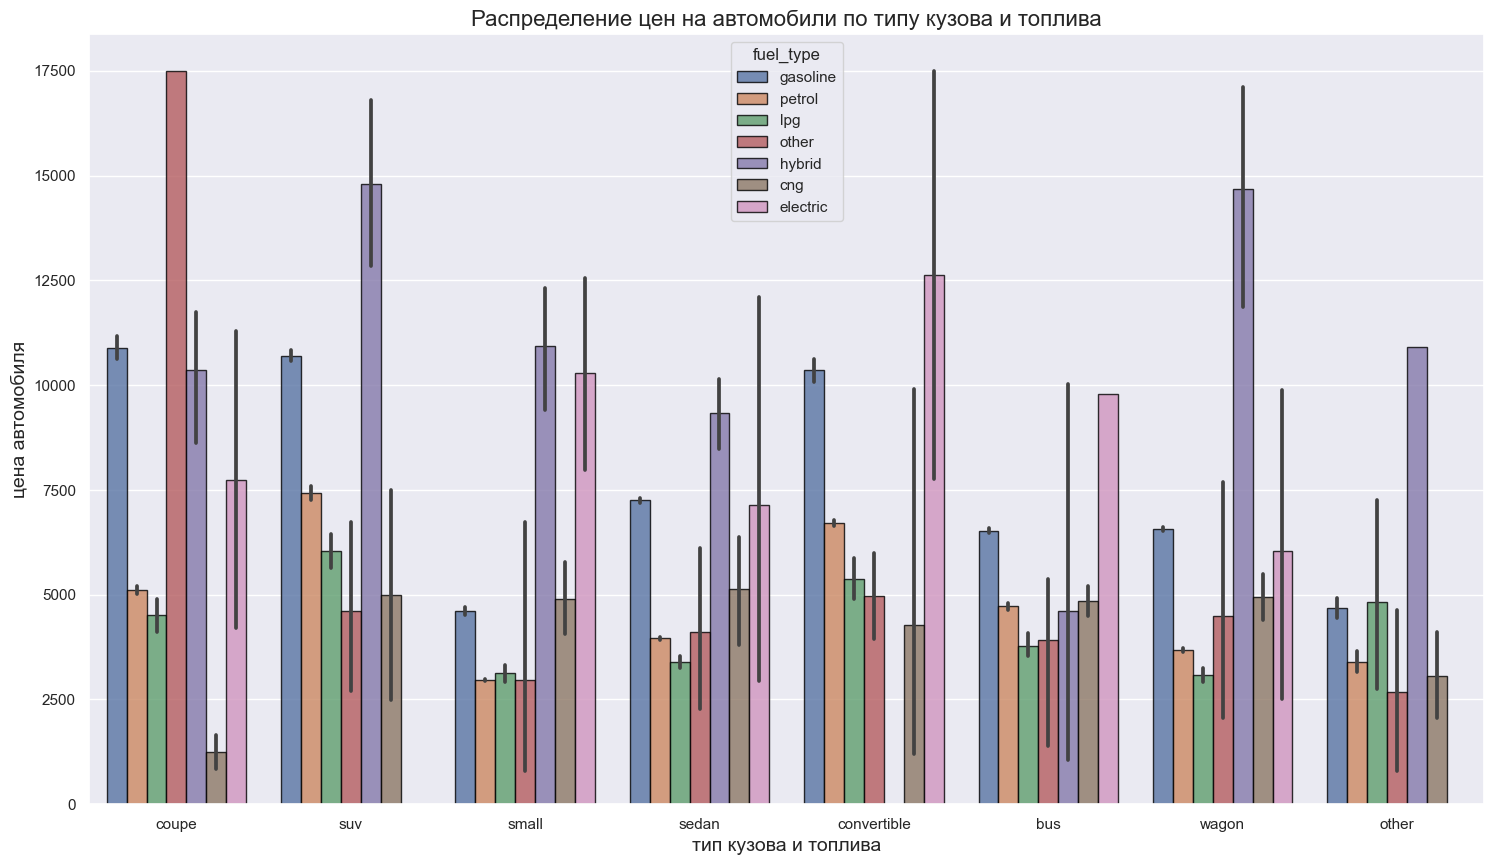

In [109]:
sns.barplot(power_autos,
            x = 'vehicle_type', 
            y = 'price', 
            hue = 'fuel_type', 
            edgecolor='black', 
            alpha = 0.8)

plt.xlabel('тип кузова и топлива',size= 14)
plt.ylabel('цена автомобиля', size= 14)
plt.title('Распределение цен на автомобили по типу кузова и топлива', size= 16)
plt.show()

In [110]:
# средние цены на автомобили по бренду в самом крупном регионе по кол-ву объявлений

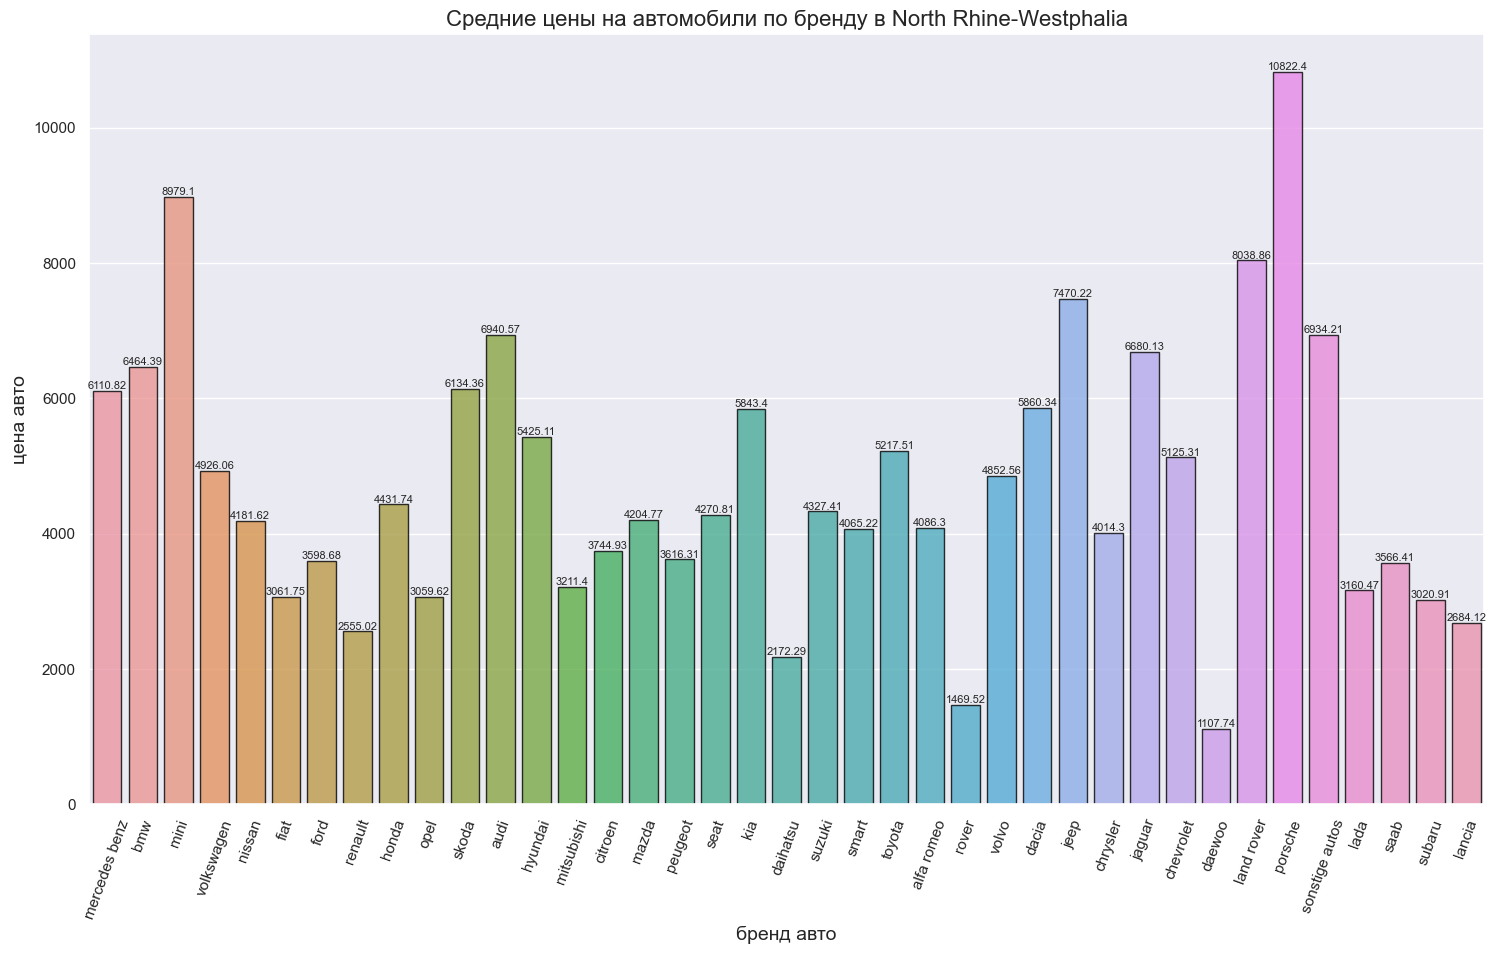

In [118]:
north_rhine = sns.barplot(power_autos[power_autos['regions'] == 'North Rhine-Westphalia'], 
            x = 'brand', 
            y = 'price',  
            edgecolor='black', 
            alpha = 0.8,
            errorbar=('ci', False))

north_rhine.tick_params(axis = 'x', rotation = 70)

for container in north_rhine.containers:
    north_rhine.bar_label(container, size = 8)

plt.xlabel('бренд авто',size= 14)
plt.ylabel('цена авто', size= 14)
plt.title('Средние цены на автомобили по бренду в North Rhine-Westphalia', size= 16)
plt.show()

In [112]:
# посомтрим на цены на автомобили с учетом мощности (60 - 65 л.с.) и наличия/отсутсвия ремонтных работ
# в нашем ДСе довольно много записей, поэтому лучше смотреть по диапазонам

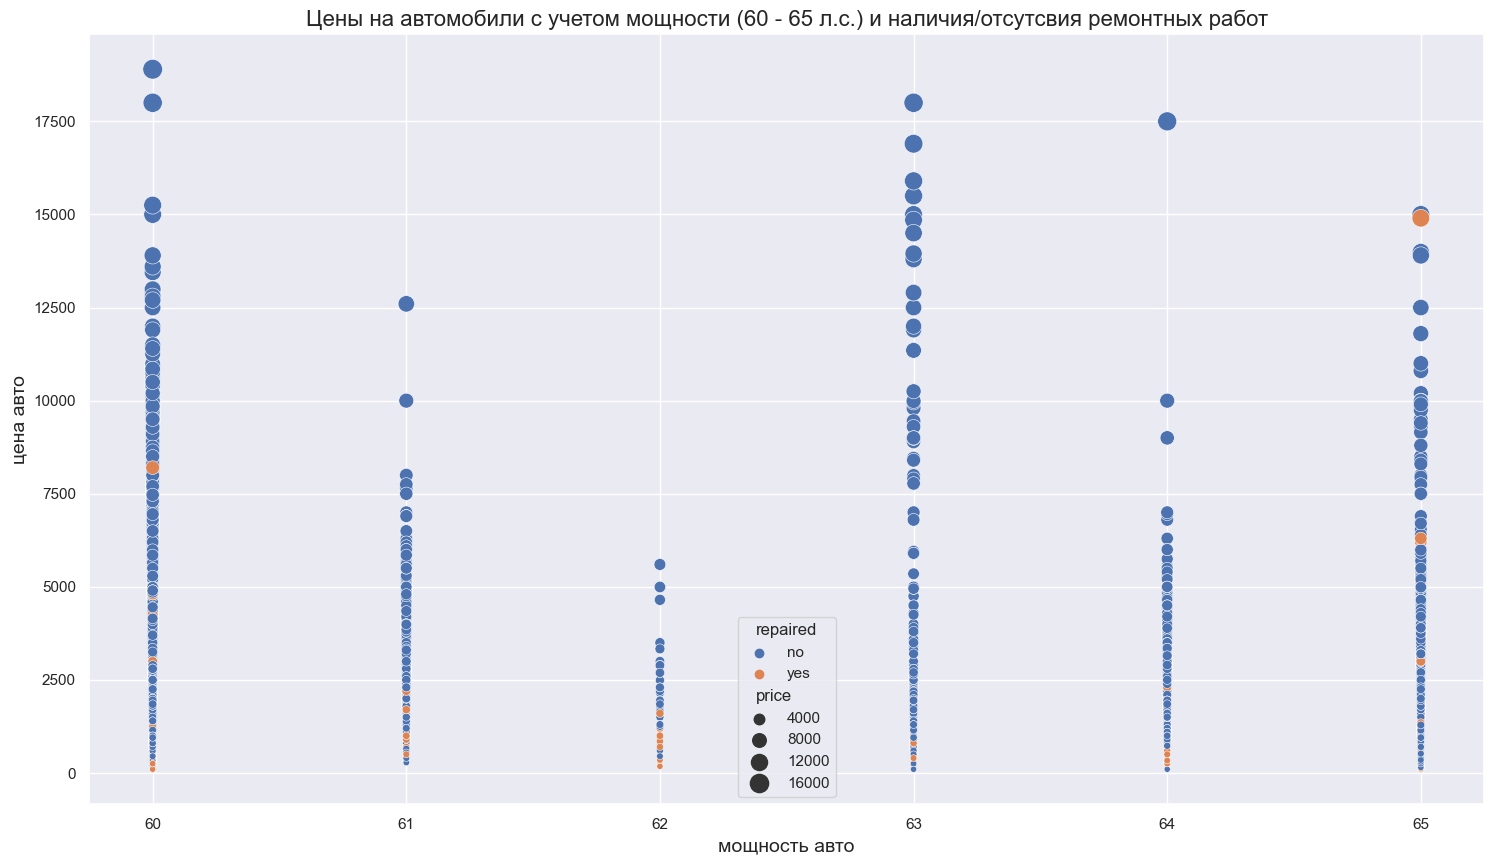

In [113]:
sns.scatterplot(power_autos[power_autos['power'].between(60,65)], 
                x = 'power', 
                y = 'price', 
                hue = 'repaired', size = 'price', sizes = (20,200))

plt.xlabel('мощность авто',size= 14)
plt.ylabel('цена авто', size= 14)
plt.title('Цены на автомобили с учетом мощности (60 - 65 л.с.) и наличия/отсутсвия ремонтных работ', size= 16)
plt.show()

In [114]:
# напоследок сделаем тепловую карту с корреляциями данных
# к сожалению, в данном ДСе не так много параметров для корреляции

In [115]:
corr_power_autos = power_autos[['price', 'registration_year', 'power', 'kilometer']].corr()
corr_power_autos

,price,registration_year,power,kilometer
price,1.000000,0.576101,0.480697,-0.422617
registration_year,0.576101,1.000000,0.153469,-0.379810
power,0.480697,0.153469,1.000000,0.118011
kilometer,-0.422617,-0.379810,0.118011,1.000000


In [116]:
# самая большая корреляция между стоимостью и годом выпуска, далее стоимостью и л.с.
# меньше всего между годом регистрации и мощностью, мощностью и пробегом
# есть даже отрицательные корреляции - цена к пробегу и год регистрации к пробегу

<Axes: >

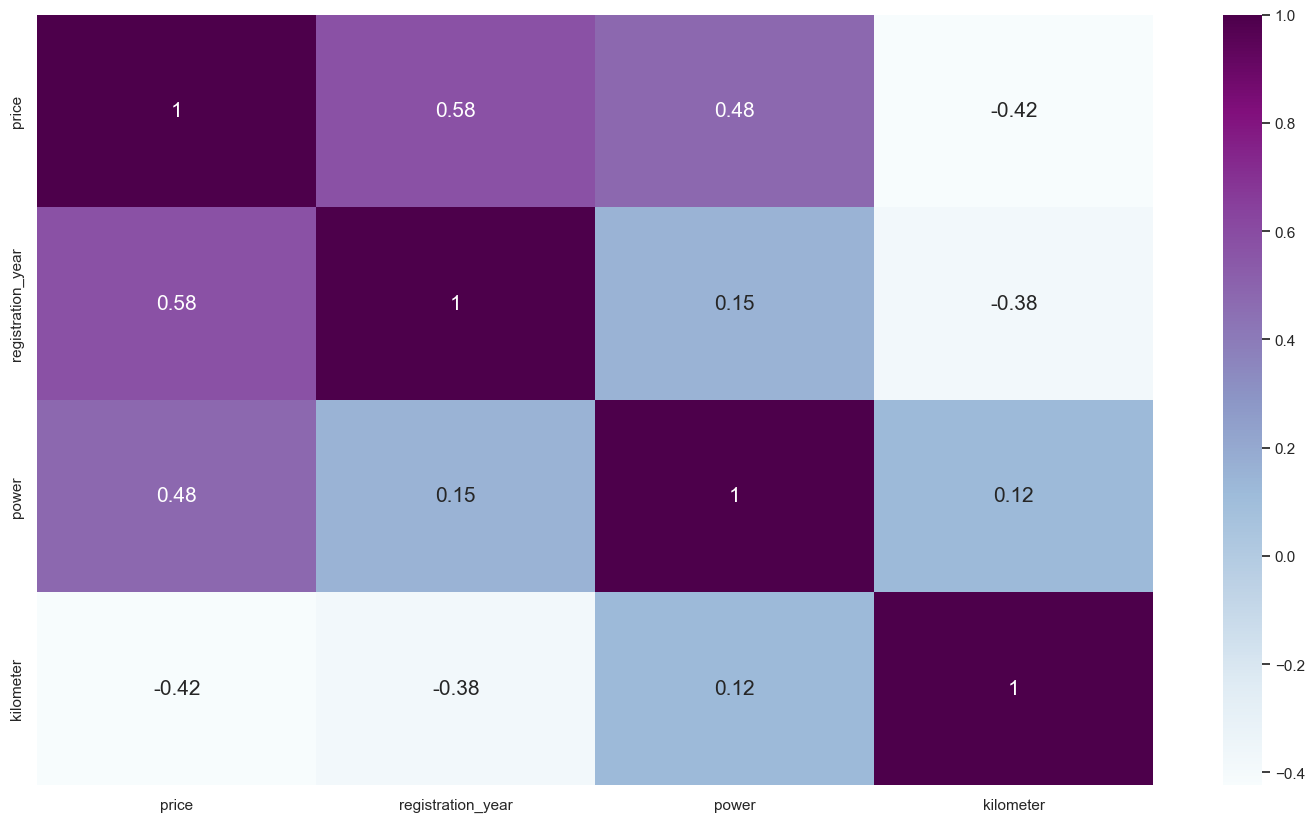

In [117]:
names = ['price', 'registration_year', 'power', 'kilometer']

sns.heatmap(corr_power_autos, 
            annot = True, 
            xticklabels = names, 
            yticklabels = names, 
            annot_kws={'size':15}, 
            cmap = 'BuPu')